<a href="https://colab.research.google.com/github/ramanarayanan-98/ml-written-assigment-5c-5d/blob/main/5c_and_5d_PiecewiseLinearFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def load_dataset():
  names = ['mpg', 'cylinders','displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',header=None,delim_whitespace=True,names=names,na_values='?')
  df = df.dropna()
  return df
df = load_dataset()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [14]:
x = df['horsepower'].values
y = df['mpg'].values

In [43]:
def createMatrix(x,lamb):
  col1 = np.ones(392)
  col2 = np.array([])
  col3 = np.array([])

  for value in x:
    if value < lamb:
      col2 = np.append(col2,value)
      col3 = np.append(col3,0)
    else:
      col2 = np.append(col2,lamb)
      col3 = np.append(col3,value-lamb)
  
  col1.shape = (392,1) if len(col1) == 392 else col1.shape
  col2.shape = (392,1) if len(col2) == 392 else col2.shape
  col3.shape = (392,1) if len(col3) == 392 else col3.shape
  matX = np.hstack((col1,col2,col3))
  return matX

matX = createMatrix(x,100)
matX

array([[  1., 100.,  30.],
       [  1., 100.,  65.],
       [  1., 100.,  50.],
       ...,
       [  1.,  84.,   0.],
       [  1.,  79.,   0.],
       [  1.,  82.,   0.]])

In [34]:
def performCalculation(x,y):
  Xt = np.transpose(x)
  beta= np.linalg.inv(Xt@x)@Xt@y
  return beta

a1,s1,s2 = performCalculation(matX,y)
print(a1,s1,s2)

53.57724087172673 -0.32638817253957364 -0.09142217282311643


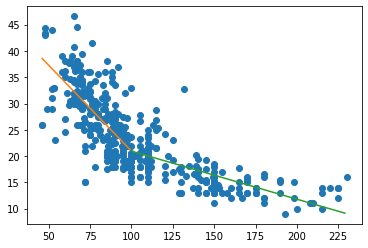

In [36]:
def plotGraph(x,y,a1,s1,s2,lamb):
  plt.plot(x,y,'o')
  x_lwr_range = np.arange(np.min(x),lamb)
  x_hr_range = np.arange(lamb,np.max(x))
  yp1 = a1 + s1*x_lwr_range
  yp2 = a1 + s1*lamb - s2*lamb + s2*x_hr_range
  plt.plot(x_lwr_range,yp1,'-')
  plt.plot(x_hr_range,yp2,'-')

plotGraph(x,y,a1,s1,s2,100)

Lamb:46.0, MinLoss till now: 13097.298714098742, Betas with min_loss(a1,s1,s2,lamb) = [10.454687877900088, 0.416159439086914, -0.15784473335365362, 46.0]
Lamb:47.0, MinLoss till now: 9295.272209392868, Betas with min_loss(a1,s1,s2,lamb) = [-279.00616312016854, 6.63056876347161, -0.15921534921297376, 47.0]
Lamb:48.0, MinLoss till now: 9295.272209392868, Betas with min_loss(a1,s1,s2,lamb) = [-279.00616312016854, 6.63056876347161, -0.15921534921297376, 47.0]
Lamb:49.0, MinLoss till now: 9295.272209392868, Betas with min_loss(a1,s1,s2,lamb) = [-279.00616312016854, 6.63056876347161, -0.15921534921297376, 47.0]
Lamb:50.0, MinLoss till now: 9295.272209392868, Betas with min_loss(a1,s1,s2,lamb) = [-279.00616312016854, 6.63056876347161, -0.15921534921297376, 47.0]
Lamb:51.0, MinLoss till now: 9295.272209392868, Betas with min_loss(a1,s1,s2,lamb) = [-279.00616312016854, 6.63056876347161, -0.15921534921297376, 47.0]
Lamb:52.0, MinLoss till now: 9295.272209392868, Betas with min_loss(a1,s1,s2,lamb

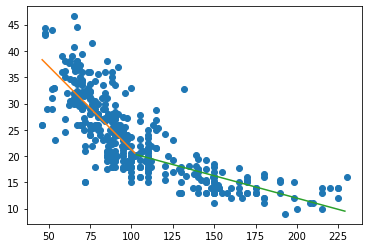

In [41]:
# Lambda is unknown
lamb_test_range = np.arange(np.min(x),np.max(x))

def bruteForceLinearFit():
  min_loss = float("inf")
  min_betas = []
  for value in lamb_test_range:
    mat = createMatrix(x,value)
    a1,s1,s2 = performCalculation(mat,y)
    
    yp = np.array([])
    for val in x:
      if val < value:
        yp = np.append(yp,a1 + s1*val)
      else:
        yp = np.append(yp,a1 + s1*value - s2*value + s2*val)
   
    loss = np.sum((y-yp)**2)
    if loss < min_loss:
      min_loss,min_betas = loss,[a1,s1,s2,value]
    
    print(f"Lamb:{value}, MinLoss till now: {min_loss}, Betas with min_loss(a1,s1,s2,lamb) = {min_betas}")
  
  plotGraph(x,y,min_betas[0],min_betas[1],min_betas[2],min_betas[3])
  
bruteForceLinearFit()
